In [1]:
!pip install pycaret

In [2]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = r"https://raw.githubusercontent.com/ralesa1312/diabetes-app/refs/heads/main/data/diabetes_012_health_indicators_BRFSS2015.csv"
data = pd.read_csv(file_path, sep=",")
data.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
data["Diabetes_012"].unique()

array([0., 2., 1.])

In [8]:
print(f"Nombre des patients negatifs :{len(data[data['Diabetes_012'] == 0.0])}")
print(f"Nombre des patients prediabetiques :{len(data[data['Diabetes_012'] == 1.0])}")
print(f"Nombre des patients diabetiques :{len(data[data['Diabetes_012'] == 2.0])}")

Nombre des patients negatifs :213703
Nombre des patients prediabetiques :4631
Nombre des patients diabetiques :35346


/tmp/ipython-input-9-2727394878.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x, y=y, palette="viridis")


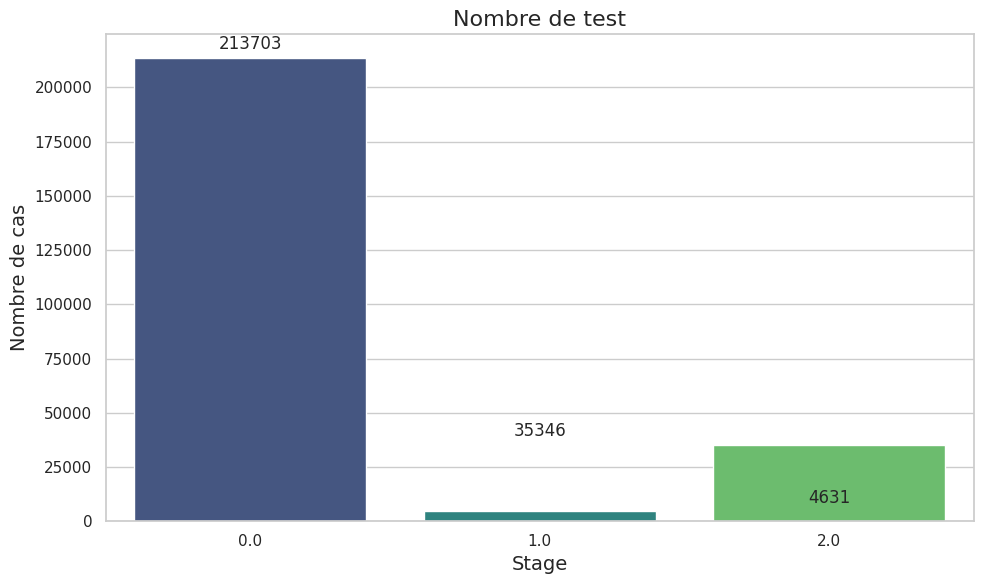

In [9]:

# Style seaborn
sns.set(style="whitegrid")

x = data["Diabetes_012"].unique().tolist()
y = data["Diabetes_012"].value_counts().values

plt.figure(figsize=(10, 6))

# Barplot avec palette
ax = sns.barplot(x=x, y=y, palette="viridis")

# Ajouter les valeurs au-dessus de chaque barre
for i, value in enumerate(y):
    ax.text(i, value + max(y)*0.01,   # position (x, y)
            str(value),               # texte
            ha='center', va='bottom', fontsize=12)

plt.title("Nombre de test", fontsize=16)
plt.xlabel("Stage", fontsize=14)
plt.ylabel("Nombre de cas", fontsize=14)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


/tmp/ipython-input-10-1784985453.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


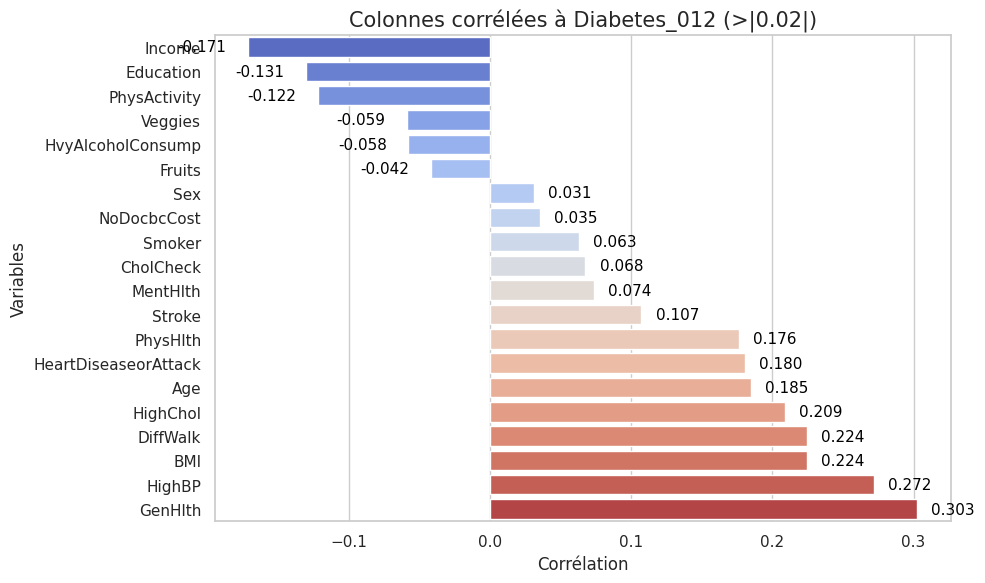

Les 20 colonnes ont une corrélation supérieure au seuil 0.02.
['Income', 'Education', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'Fruits', 'Sex', 'NoDocbcCost', 'Smoker', 'CholCheck', 'MentHlth', 'Stroke', 'PhysHlth', 'HeartDiseaseorAttack', 'Age', 'HighChol', 'DiffWalk', 'BMI', 'HighBP', 'GenHlth']


In [10]:
def plot_correlated_with_target(data, target="Diabetes_012", threshold=0.02):
    # Garder uniquement les colonnes numériques
    num_data = data.select_dtypes(include=[np.number])

    # Corrélation avec la cible
    correlations = num_data.corr()[target].drop(target)

    # Filtrer
    strong_corr = correlations[abs(correlations) >= abs(threshold)]

    # Si aucun résultat
    if strong_corr.empty:
        print("Aucune colonne avec corrélation supérieure au threshold.")
        return

    # Convertir en DataFrame pour Seaborn
    df_plot = strong_corr.reset_index()
    df_plot.columns = ["Feature", "Correlation"]

    # Trier
    df_plot = df_plot.sort_values(by="Correlation", ascending=True)

    # Plot seaborn
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=df_plot,
        y="Feature",
        x="Correlation",
        palette="coolwarm"
    )

    # Ajouter valeurs numériques sur les barres
    for i, row in enumerate(df_plot.itertuples()):
        ax.text(
            row.Correlation + (0.01 if row.Correlation >= 0 else -0.05),
            i,
            f"{row.Correlation:.3f}",
            va="center",
            color="black",
            fontsize=11
        )

    plt.title(f"Colonnes corrélées à {target} (>|{threshold}|)", fontsize=15)
    plt.xlabel("Corrélation")
    plt.ylabel("Variables")
    plt.tight_layout()
    plt.show()

    print(f"Les {len(df_plot)} colonnes ont une corrélation supérieure au seuil {threshold}.")
    print(df_plot["Feature"].tolist())


# Exemple d'utilisation
plot_correlated_with_target(data, threshold=0.02)

In [11]:
strong_col =['Income', 'Education', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'Smoker', 'CholCheck', 'MentHlth', 'Stroke', 'PhysHlth', 'HeartDiseaseorAttack', 'Age', 'HighChol', 'DiffWalk', 'BMI', 'HighBP', 'GenHlth']


df = data[strong_col + ["Diabetes_012"]]
df.head(5)

,Income,Education,PhysActivity,Veggies,HvyAlcoholConsump,Smoker,CholCheck,MentHlth,Stroke,PhysHlth,HeartDiseaseorAttack,Age,HighChol,DiffWalk,BMI,HighBP,GenHlth,Diabetes_012
0,3.0,4.0,0.0,1.0,0.0,1.0,1.0,18.0,0.0,15.0,0.0,9.0,1.0,1.0,40.0,1.0,5.0,0.0
1,1.0,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,25.0,0.0,3.0,0.0
2,8.0,4.0,0.0,0.0,0.0,0.0,1.0,30.0,0.0,30.0,0.0,9.0,1.0,1.0,28.0,1.0,5.0,0.0
3,6.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,27.0,1.0,2.0,0.0
4,4.0,5.0,1.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,11.0,1.0,0.0,24.0,1.0,2.0,0.0


In [12]:
df.isna().value_counts()
print(f"Nombre de valeurs manquantes dans Diabetes_012: {df['Diabetes_012'].unique()}")


Nombre de valeurs manquantes dans Diabetes_012: [0. 2. 1.]


In [13]:
!pip install imbalanced-learn

In [14]:
from collections import Counter
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Séparation des caractéristiques (X) et de la cible (y)
X = df.drop(columns=['Diabetes_012'])
y = df['Diabetes_012']

# Définition des tailles initiales
initial_counts = Counter(y)
target_size = 35346 # Taille cible pour l'équilibrage

# --- 1. Stratégie pour l'Over-sampler (AUGMENTER) ---
# L'over-sampler ne doit agir que sur les classes qui sont SOUS la cible (classes minoritaires).
# Nous lui disons d'augmenter ces classes à la taille cible.
oversampling_strategy = {
    class_label: target_size
    for class_label, count in initial_counts.items()
    if count < target_size
}

# --- 2. Stratégie pour l'Under-sampler (RÉDUIRE) ---
# L'under-sampler ne doit agir que sur les classes qui sont AU-DESSUS de la cible (classe majoritaire).
# Nous lui disons de réduire cette classe à la taille cible.
undersampling_strategy = {
    class_label: target_size
    for class_label, count in initial_counts.items()
    if count > target_size
}

print(f"Stratégie OverSampling (minorités): {oversampling_strategy}")
print(f"Stratégie UnderSampling (majorités): {undersampling_strategy}")

# --- 3. Construction et Application du Pipeline ---

# Étape 1: Over-sampling (RandomOverSampler)
over = RandomOverSampler(sampling_strategy=oversampling_strategy, random_state=42)

# Étape 2: Under-sampling (RandomUnderSampler)
under = RandomUnderSampler(sampling_strategy=undersampling_strategy, random_state=42)

# Construction du pipeline (Over puis Under)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Application sur l'ensemble du jeu de données (X et y)
X_res, y_res = pipeline.fit_resample(X, y)

# Vérification finale
print("---")
print(f"Nouvelle taille du dataset : {len(X_res)}")
print(f"Distribution finale des classes : {Counter(y_res)}")

Stratégie OverSampling (minorités): {1.0: 35346}
Stratégie UnderSampling (majorités): {0.0: 35346}
---
Nouvelle taille du dataset : 106038
Distribution finale des classes : Counter({0.0: 35346, 1.0: 35346, 2.0: 35346})


In [15]:
# Recombinaison en un seul DataFrame équilibré
df_balanced = pd.concat([X_res, y_res.rename('Diabetes_012')], axis=1)

# Le type de la colonne cible doit être un entier pour la classification.
# Assurez-vous qu'elle est bien 'int' et non 'float'.
df_balanced['Diabetes_012'] = df_balanced['Diabetes_012'].astype(int)

print("Le DataFrame équilibré est prêt avec la forme:", df_balanced.shape)
print("Nouvelle distribution:", df_balanced['Diabetes_012'].value_counts())

Le DataFrame équilibré est prêt avec la forme: (106038, 18)
Nouvelle distribution: Diabetes_012
0    35346
1    35346
2    35346
Name: count, dtype: int64


In [16]:
from pycaret.classification import *

# 1. Initialiser l'environnement PyCaret
# target = 'Diabetes_012'
# data = df_balanced
# session_id assure la reproductibilité
classification_setup = setup(
    data=df_balanced,
    target='Diabetes_012',
    session_id=42,
    # Normalisez les données numériques (BMI, MentHlth, PhysHlth, etc.) si nécessaire
    normalize=True,
    # Utilisez la métrique appropriée pour les données équilibrées, comme l'Accuracy
    # (Bien que le F1-Score reste pertinent pour ce type de problème médical)
    # L'objectif est multiclasse, PyCaret le gère automatiquement.
)


,Description,Value
0,Session id,42
1,Target,Diabetes_012
2,Target type,Multiclass
3,Original data shape,"(106038, 18)"
4,Transformed data shape,"(106038, 18)"
5,Transformed train set shape,"(74226, 18)"
6,Transformed test set shape,"(31812, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


target = la colonne à prédire

silent = True pour éviter les questions interactives

session_id pour la reproductibilité

In [17]:
# 2. Comparer les modèles
best_model = compare_models(
    sort='Accuracy', # Triez par 'Accuracy', 'F1', ou 'AUC'
    n_select=3       # Choisissez les 3 meilleurs modèles pour une analyse plus poussée
)

print(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8027,0.9239,0.8027,0.7996,0.8001,0.7040,0.7050,9.0130
et,Extra Trees Classifier,0.7964,0.9155,0.7964,0.7937,0.7944,0.6946,0.6952,10.1340
dt,Decision Tree Classifier,0.7222,0.7934,0.7222,0.7110,0.7125,0.5833,0.5866,0.3430
knn,K Neighbors Classifier,0.6710,0.8317,0.6710,0.6754,0.6598,0.5065,0.5178,5.1000
xgboost,Extreme Gradient Boosting,0.6216,0.8015,0.6216,0.6233,0.6219,0.4324,0.4328,2.9570
lightgbm,Light Gradient Boosting Machine,0.5829,0.7709,0.5829,0.5835,0.5817,0.3743,0.3753,7.9420
gbc,Gradient Boosting Classifier,0.5384,0.0000,0.5384,0.5349,0.5343,0.3077,0.3091,18.4920
ada,Ada Boost Classifier,0.5214,0.0000,0.5214,0.5118,0.5119,0.2821,0.2848,1.6680
lr,Logistic Regression,0.5196,0.0000,0.5196,0.5086,0.5085,0.2794,0.2826,1.0630
lda,Linear Discriminant Analysis,0.5179,0.0000,0.5179,0.5099,0.5116,0.2768,0.2781,0.1490


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, rand

In [19]:
# --- ÉTAPE 1: CRÉER le modèle non-affiné ---
rf_model = create_model('rf')

# --- ÉTAPE 2: AFFINER le modèle entraîné (ou l'objet créé) ---
tuned_rf = tune_model(
    estimator=rf_model, # Passez l'objet modèle créé, et non la chaîne 'rf'
    optimize='F1',
    n_iter=50
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8044,0.9249,0.8044,0.8009,0.8018,0.7066,0.7074
1,0.8002,0.9236,0.8002,0.7966,0.7971,0.7003,0.7015
2,0.8002,0.9232,0.8002,0.7965,0.7974,0.7003,0.7011
3,0.8006,0.9235,0.8006,0.7973,0.7980,0.7009,0.7017
4,0.8051,0.9228,0.8051,0.8018,0.8026,0.7076,0.7084
5,0.8029,0.9227,0.8029,0.8011,0.8007,0.7044,0.7055
6,0.8061,0.9252,0.8061,0.8032,0.8038,0.7092,0.7100
7,0.8034,0.9268,0.8034,0.8001,0.8004,0.7051,0.7063
8,0.8040,0.9230,0.8040,0.8009,0.8014,0.7059,0.7068


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5767,0.7640,0.5767,0.5763,0.5715,0.3651,0.3683
1,0.5670,0.7618,0.5670,0.5675,0.5621,0.3505,0.3538
2,0.5661,0.7614,0.5661,0.5659,0.5615,0.3491,0.3519
3,0.5665,0.7691,0.5665,0.5656,0.5613,0.3497,0.3527
4,0.5754,0.7667,0.5754,0.5766,0.5703,0.3631,0.3667
5,0.5647,0.7658,0.5647,0.5660,0.5595,0.3471,0.3509
6,0.5698,0.7643,0.5698,0.5691,0.5640,0.3547,0.3582
7,0.5783,0.7710,0.5783,0.5789,0.5731,0.3674,0.3711
8,0.5670,0.7627,0.5670,0.5677,0.5629,0.3504,0.3533


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [22]:
final_model = finalize_model(rf_model)
print("Le modèle finalisé est le RandomForest non-tuné, le plus performant.")

Le modèle finalisé est le RandomForest non-tuné, le plus performant.


In [23]:
# Sauvegarde du modèle sous forme de fichier pickle (.pkl)
save_model(final_model, 'modele_diabete_final_rf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Income', 'Education',
                                              'PhysActivity', 'Veggies',
                                              'HvyAlcoholConsump', 'Smoker',
                                              'CholCheck', 'MentHlth', 'Stroke',
                                              'PhysHlth', 'HeartDiseaseorAttack',
                                              'Age', 'HighChol', 'DiffWalk',
                                              'BMI', 'HighBP', 'GenHlth'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               co...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                 

In [27]:


# --- Exemple de Données Inconnues (5 Nouveaux Patients) ---
data_col = [
    'Income', 'Education', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump',
    'Smoker', 'CholCheck', 'MentHlth', 'Stroke', 'PhysHlth',
    'HeartDiseaseorAttack', 'Age', 'HighChol', 'DiffWalk', 'BMI',
    'HighBP', 'GenHlth'
]

# Les valeurs ci-dessous sont purement fictives pour tester le modèle :
data_inconnues_values = [
    # Patient 1 (Risque très élevé : Age avancé, Mauvaise santé, BMI élevé, AVC)
    [2.0, 3.0, 0.0, 0.0, 0.0, 1.0, 1.0, 20.0, 1.0, 30.0, 1.0, 12.0, 1.0, 1.0, 40.0, 1.0, 5.0],
    # Patient 2 (Risque faible : Jeune, en forme, bon revenu)
    [8.0, 6.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 21.5, 0.0, 1.0],
    # Patient 3 (Risque modéré : Fumeur, Hypertension, mais actif)
    [5.0, 5.0, 1.0, 1.0, 0.0, 1.0, 1.0, 5.0, 0.0, 10.0, 0.0, 8.0, 1.0, 0.0, 27.0, 1.0, 3.0],
    # Patient 4 (Risque très faible : Pour confirmer la classe 0.0)
    [7.0, 6.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 23.5, 0.0, 1.0],
    # Patient 5 (Potentiel Prédiabète : IMC élevé, Cholestérol, mais jeune)
    [6.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 1.0, 0.0, 32.0, 0.0, 3.0],
   [7.0, 6.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 26.0, 0.0, 2.0],
    [1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 15.0, 1.0, 09.0, 1.0, 1.0, 1.0, 1.0, 1.0]
]

data_inconnues = pd.DataFrame(data_inconnues_values, columns=data_col)
print("DataFrame des données inconnues prêt (5 patients) :")
print(data_inconnues)

# --- Exécution de la Prédiction ---

predictions = predict_model(estimator=final_model, data=data_inconnues)

# --- Affichage des Résultats ---
print("\nRésultats de la Prédiction du Statut Diabétique :")
print("-" * 45)

predictions_summary = predictions[[
    'HighBP', 'BMI', 'Age', 'prediction_label', 'prediction_score'
]].rename(columns={
    'prediction_label': 'Statut_Diabetes_012',
    'prediction_score': 'Confiance_Modele'
})

# Interprétation des étiquettes
predictions_summary['Statut_Diabetes_012'] = predictions_summary['Statut_Diabetes_012'].map({
    0.0: '0 - Négatif',
    1.0: '1 - Prédiabétique',
    2.0: '2 - Diabétique'
})

print(predictions_summary)

DataFrame des données inconnues prêt (5 patients) :
   Income  Education  PhysActivity  Veggies  HvyAlcoholConsump  Smoker  \
0     2.0        3.0           0.0      0.0                0.0     1.0   
1     8.0        6.0           1.0      1.0                0.0     0.0   
2     5.0        5.0           1.0      1.0                0.0     1.0   
3     7.0        6.0           1.0      1.0                1.0     0.0   
4     6.0        4.0           0.0      0.0                0.0     0.0   
5     7.0        6.0           1.0      1.0                0.0     0.0   
6     1.0        2.0           1.0      1.0                1.0     1.0   

   CholCheck  MentHlth  Stroke  PhysHlth  HeartDiseaseorAttack   Age  \
0        1.0      20.0     1.0      30.0                   1.0  12.0   
1        1.0       0.0     0.0       0.0                   0.0   3.0   
2        1.0       5.0     0.0      10.0                   0.0   8.0   
3        1.0       0.0     0.0       0.0                   0.0   4.


Résultats de la Prédiction du Statut Diabétique :
---------------------------------------------
   HighBP   BMI   Age Statut_Diabetes_012  Confiance_Modele
0     1.0  40.0  12.0      2 - Diabétique            0.9600
1     0.0  21.5   3.0         0 - Négatif            1.0000
2     1.0  27.0   8.0      2 - Diabétique            0.5100
3     0.0  23.5   4.0         0 - Négatif            0.9800
4     0.0  32.0   6.0         0 - Négatif            0.4400
5     0.0  26.0   6.0      2 - Diabétique            0.5317
6     1.0   1.0   9.0      2 - Diabétique            0.4800
